In [228]:
%cd ../../../data/round3/days/

/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/data/round3/days


In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
df0 = pd.read_csv('day0.csv')
df1 = pd.read_csv('day1.csv')
df1['timestamp'] = df1['timestamp'] + 1000000
df2 = pd.read_csv('day2.csv')
df2['timestamp'] = df2['timestamp'] + 2000000
df = pd.concat([df0, df1, df2], ignore_index=True)


In [231]:
print(df.columns)

Index(['timestamp', 'VOLCANIC_ROCK', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500', 'T',
       'iv_9500', 'iv_9750', 'iv_10000', 'iv_10250', 'iv_10500', 'm_9500',
       'm_9750', 'm_10000', 'm_10250', 'm_10500', 'beta_0', 'beta_1', 'beta_2',
       'base_iv', 'fitted_iv_9500', 'fitted_iv_9750', 'fitted_iv_10000',
       'fitted_iv_10250', 'fitted_iv_10500'],
      dtype='object')


In [232]:
slice = df[df['timestamp'] == 140000]

In [233]:
slice

,timestamp,VOLCANIC_ROCK,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500,T,iv_9500,iv_9750,...,m_10500,beta_0,beta_1,beta_2,base_iv,fitted_iv_9500,fitted_iv_9750,fitted_iv_10000,fitted_iv_10250,fitted_iv_10500
1400,140000,10415.5,915.5,666.5,420.5,199.5,58.5,0.027222,0.057781,0.172713,...,0.048973,0.139667,-0.262165,-0.68224,0.139667,0.073718,0.135321,0.162818,0.158688,0.125192


In [234]:
ivs = np.array([slice['iv_9500'].values[0], slice['iv_9750'].values[0], slice['iv_10000'].values[0], slice['iv_10250'].values[0], slice['iv_10500'].values[0]])
ms = np.array([slice['m_9500'].values[0], slice['m_9750'].values[0], slice['m_10000'].values[0], slice['m_10250'].values[0], slice['m_10500'].values[0]])
beta0, beta1, beta2 = slice['beta_0'].values[0], slice['beta_1'].values[0], slice['beta_2'].values[0]
base_iv = slice['base_iv'].values[0]

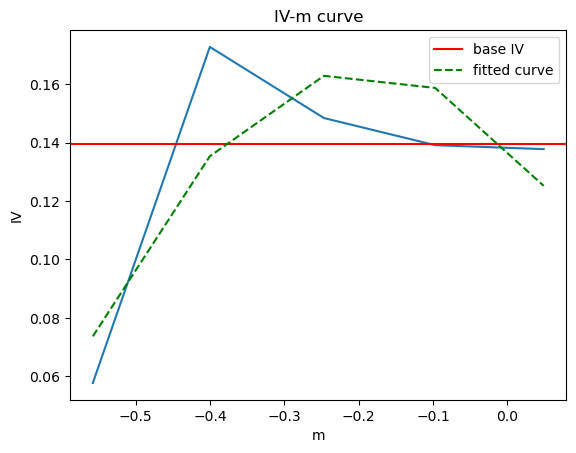

In [235]:
plt.plot(ms, ivs)
plt.xlabel('m')   
plt.ylabel('IV')  
plt.title('IV-m curve')
#横线
plt.axhline(y=base_iv, color='r', linestyle='-', label = 'base IV')
#用beta0, beta1, beta2画出拟合曲线
plt.plot(ms, beta0 + beta1*ms + beta2*ms**2, color='g', linestyle='--', label = 'fitted curve')
plt.legend()

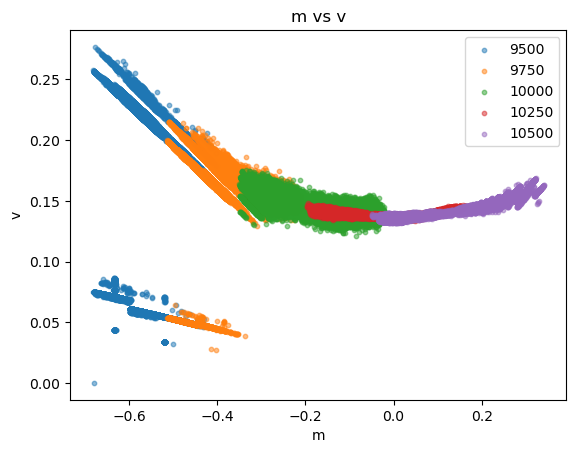

In [ ]:
#画出m, v散点图
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df['m_9500'], df['iv_9500'], s=10, alpha=0.5, label = '9500')
plt.scatter(df['m_9750'], df['iv_9750'], s=10, alpha=0.5, label = '9750')
plt.scatter(df['m_10000'], df['iv_10000'], s=10, alpha=0.5, label = '10000')
plt.scatter(df['m_10250'], df['iv_10250'], s=10, alpha=0.5, label = '10250')
plt.scatter(df['m_10500'], df['iv_10500'], s=10, alpha=0.5, label = '10500')
plt.title('m vs v')
plt.xlabel('m')
plt.ylabel('v')
plt.legend()
plt.show()


In [237]:
df.columns

Index(['timestamp', 'VOLCANIC_ROCK', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500', 'T',
       'iv_9500', 'iv_9750', 'iv_10000', 'iv_10250', 'iv_10500', 'm_9500',
       'm_9750', 'm_10000', 'm_10250', 'm_10500', 'beta_0', 'beta_1', 'beta_2',
       'base_iv', 'fitted_iv_9500', 'fitted_iv_9750', 'fitted_iv_10000',
       'fitted_iv_10250', 'fitted_iv_10500'],
      dtype='object')

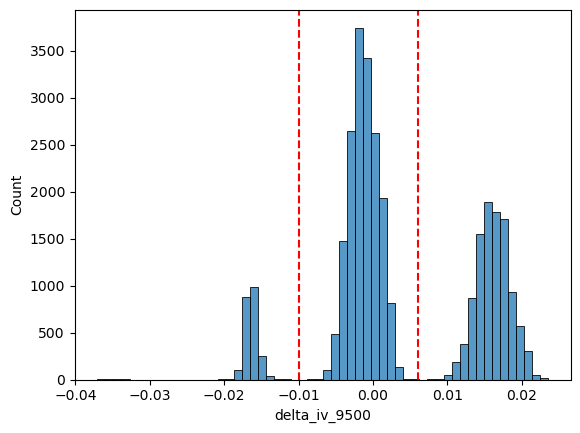

In [243]:
df['delta_iv_9500'] = df['fitted_iv_9500'] - df['iv_9500']
import seaborn as sns
sns.histplot(df['delta_iv_9500'])
plt.axvline(x = 0.006, color='r', linestyle='--')
plt.axvline(x = -0.01, color='r', linestyle='--')

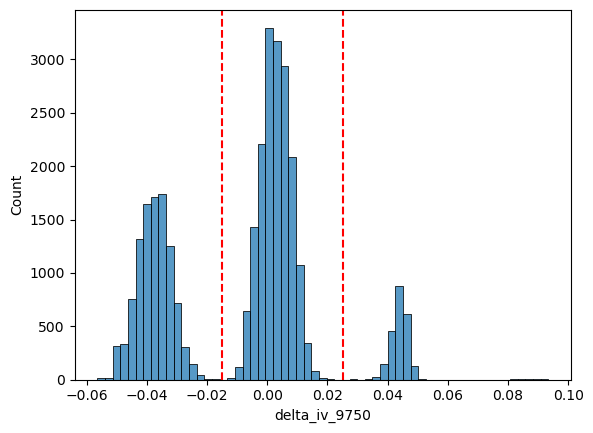

In [245]:
df['delta_iv_9750'] = df['fitted_iv_9750'] - df['iv_9750']
import seaborn as sns
sns.histplot(df['delta_iv_9750'])
plt.axvline(x = 0.025, color='r', linestyle='--')
plt.axvline(x = -0.015, color='r', linestyle='--')

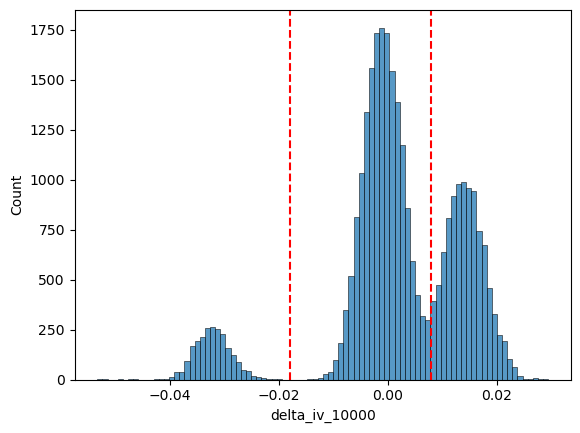

In [249]:
df['delta_iv_10000'] = df['fitted_iv_10000'] - df['iv_10000']
import seaborn as sns
sns.histplot(df['delta_iv_10000'])
plt.axvline(x = 0.008, color='r', linestyle='--')
plt.axvline(x = -0.018, color='r', linestyle='--')

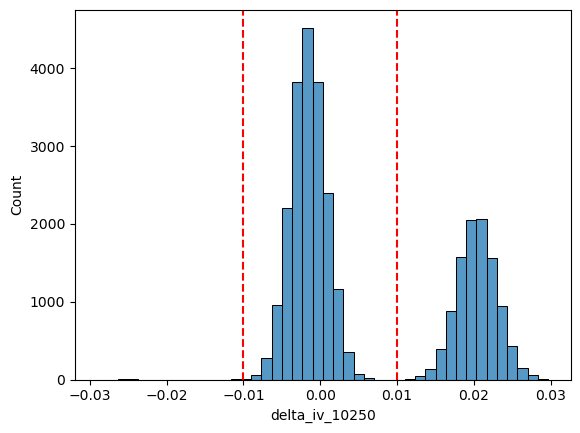

In [251]:
df['delta_iv_10250'] = df['fitted_iv_10250'] - df['iv_10250']
import seaborn as sns
sns.histplot(df['delta_iv_10250'])
plt.axvline(x = 0.01, color='r', linestyle='--')
plt.axvline(x = -0.01, color='r', linestyle='--')

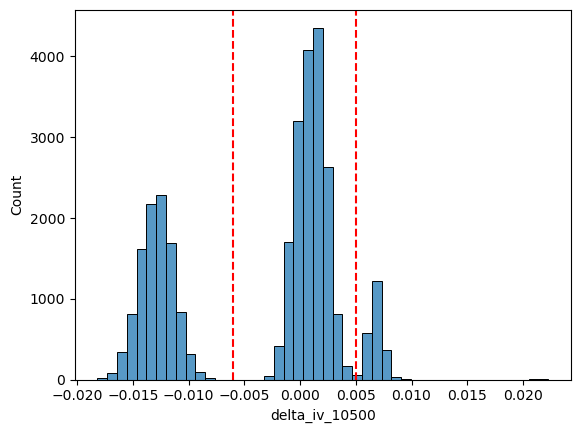

In [254]:
df['delta_iv_10500'] = df['fitted_iv_10500'] - df['iv_10500']
import seaborn as sns
sns.histplot(df['delta_iv_10500'])
plt.axvline(x = 0.005, color='r', linestyle='--')
plt.axvline(x = -0.006, color='r', linestyle='--')

<Axes: xlabel='base_iv', ylabel='Count'>

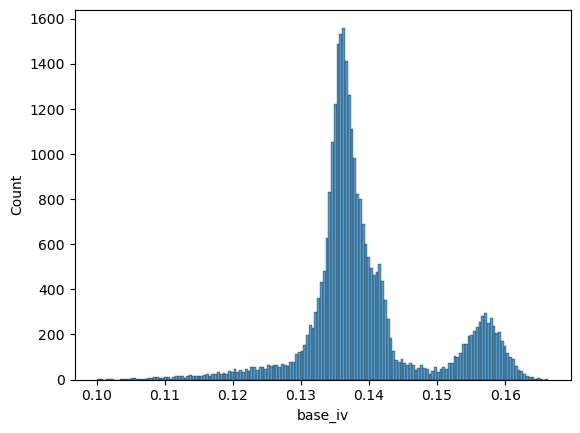

In [255]:
sns.histplot(df['base_iv'])

In [ ]:
df['iv_9500'].describe()


count    29801.000000
mean         0.152813
std          0.078100
min          0.000104
25%          0.068936
50%          0.190995
75%          0.223573
max          0.276761
Name: iv_9500, dtype: float64

In [ ]:
df['iv_9750'].describe()

count    29801.000000
mean         0.161991
std          0.035218
min          0.026906
25%          0.156380
50%          0.169057
75%          0.181795
max          0.215184
Name: iv_9750, dtype: float64

In [ ]:
df['iv_10000'].describe()

count    29801.000000
mean         0.148316
std          0.008241
min          0.121222
25%          0.141943
50%          0.148262
75%          0.154470
max          0.175109
Name: iv_10000, dtype: float64

In [ ]:
df['iv_10250'].describe()

count    29801.000000
mean         0.138926
std          0.002030
min          0.133557
25%          0.137507
50%          0.138814
75%          0.140167
max          0.147865
Name: iv_10250, dtype: float64

In [ ]:
df['iv_10500'].describe()

count    29801.000000
mean         0.141841
std          0.007382
min          0.131478
25%          0.136227
50%          0.138751
75%          0.146396
max          0.168837
Name: iv_10500, dtype: float64